# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

from google.colab import files

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
df.corr(numeric_only=True)

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.024428,0.004782,-0.007397,-0.026310
CustomerAge,-0.024428,1.000000,-0.009852,0.007876,0.321161
TransactionDuration,0.004782,-0.009852,1.000000,0.030076,0.006859
LoginAttempts,-0.007397,0.007876,0.030076,1.000000,0.009088
AccountBalance,-0.026310,0.321161,0.006859,0.009088,1.000000


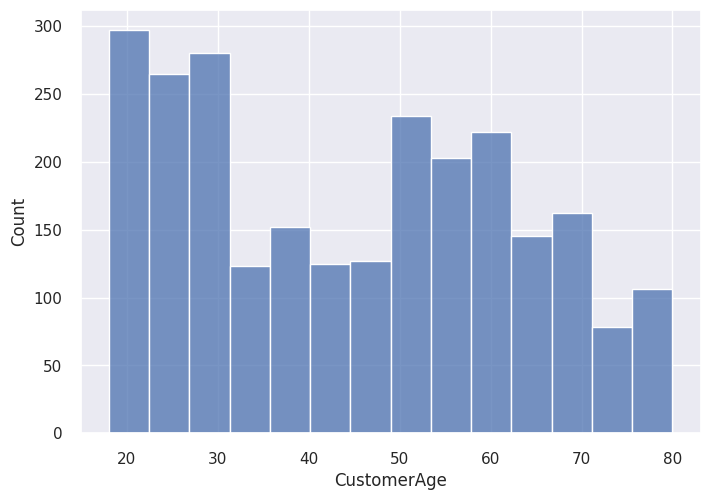

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
sns.set(style="darkgrid")
sns.histplot(data=df, x='CustomerAge')
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:
1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


## **3.1 Check Nilai Kosong**

In [9]:
## **3.1 Check Nilai Kosong**
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


### **3.1.1 handling nilai kosong (Advanced skill)**

In [10]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.dropna()
df_cleaned.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36


## **3.2 Check Nilai Duplikasi**

In [11]:
# Mengecek dataset menggunakan duplicated().sum()
df_cleaned.duplicated().sum()

np.int64(21)

### **3.2.1 Handling nilai duplikasi (Andvanced skill)**

In [12]:
df_processed = df_cleaned.copy()
df_processed = df_processed.drop_duplicates()
df_processed.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36


## **3.3 Feature Scaling**

In [13]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
scalar = MinMaxScaler()

# Memilih fitur numerik untuk feature scaling
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration','LoginAttempts', 'AccountBalance']

# Menerapkan feature scaling pada fitur numerik
df_scaled_numerical = scalar.fit_transform(df_processed[numerical_cols])
df_scaled_numerical = pd.DataFrame(df_scaled_numerical, columns=numerical_cols, index=df_processed.index)

# Pastikan kamu menggunakan function head setelah melalukan scaling.
df_scaled_numerical.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,0.007554,0.838710,0.244828,0.0,0.336790
1,0.205368,0.806452,0.451724,0.0,0.918049
2,0.068840,0.016129,0.158621,0.0,0.068578
3,0.100636,0.129032,0.051724,0.0,0.569170
5,0.050192,0.000000,0.558621,0.0,0.045677


## **3.4 Hilangkan Sebagian Kolom**

In [14]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
id_cols = ['TransactionID','AccountID','DeviceID','IP Address','MerchantID']
df_processed = df_cleaned.drop(columns=id_cols).drop_duplicates()
df_processed.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36


## **3.5 Feature Encoding**

In [15]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
categorical_cols_to_encode = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Inisiasi LabelEncoder dan buat df_processed[categorical_cols].copy()
encoders = {}
df_encoded_categorical = df_processed[categorical_cols_to_encode].copy()

# Terapkan LabelEncoder untuk fitur kategorikal dan simpan encoder
for col in categorical_cols_to_encode:
    len = LabelEncoder()
    df_encoded_categorical[col] = len.fit_transform(df_encoded_categorical[col].astype(str))
    encoders[col] = len

# Menggabungkan antara scaled numerical and encoded categorical features, Memasukkan 'PreviousTransactionDate' dan 'TransactionDate' yang tidak diencoding
df_scaled = pd.concat([df_scaled_numerical.reset_index(drop=True), df_encoded_categorical.reset_index(drop=True), df_processed[['PreviousTransactionDate', 'TransactionDate']].reset_index(drop=True)], axis=1)

# Pastikan kamu menggunakan function head setelah melalukan encoding.
df_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate,TransactionDate
0,0.007554,0.838710,0.244828,0.0,0.336790,1,36,0,0,2024-11-04 08:08:08,2023-04-11 16:29:14
1,0.205368,0.806452,0.451724,0.0,0.918049,1,15,0,0,2024-11-04 08:09:35,2023-06-27 16:44:19
2,0.068840,0.016129,0.158621,0.0,0.068578,1,23,2,3,2024-11-04 08:07:04,2023-07-10 18:16:08
3,0.100636,0.129032,0.051724,0.0,0.569170,1,33,2,3,2024-11-04 08:09:06,2023-05-05 16:32:11
4,0.050192,0.000000,0.558621,0.0,0.045677,1,28,0,3,2024-11-04 08:06:36,2023-04-03 17:15:01


In [16]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
df_scaled.columns.tolist()
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

['TransactionAmount',
 'CustomerAge',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerOccupation',
 'PreviousTransactionDate',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [17]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [18]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [19]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [20]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [21]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_scaled.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation
count,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000
mean,0.162684,0.429402,0.379837,0.029391,0.335537,0.773302,21.251991,0.978923,1.503044
std,0.158930,0.287665,0.244355,0.144556,0.263494,0.418794,12.302811,0.807083,1.135961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.045219,0.145161,0.182759,0.000000,0.092778,1.000000,11.000000,0.000000,0.000000
50%,0.116383,0.435484,0.355172,0.000000,0.304936,1.000000,21.000000,1.000000,1.000000
75%,0.226338,0.661290,0.524138,0.000000,0.510542,1.000000,32.000000,2.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42.000000,2.000000,3.000000


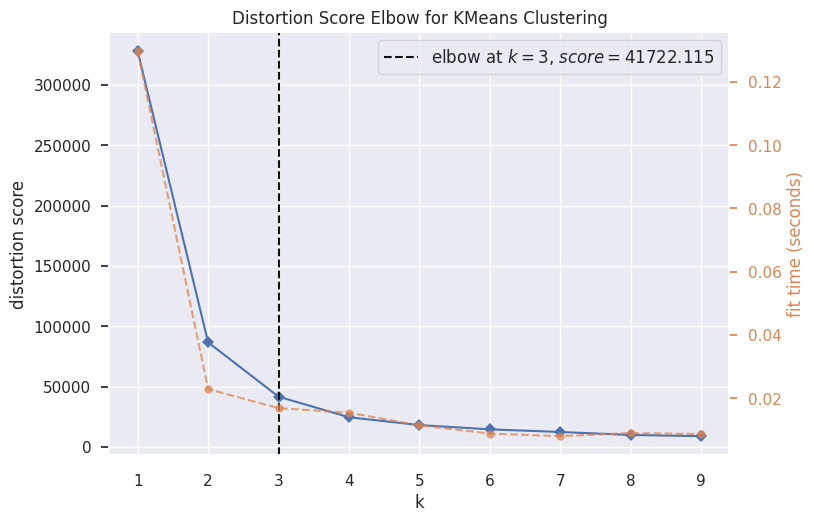

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
# Keluarkan kolom non-numeric sebelum fitting
visualizer.fit(df_scaled.drop(columns=['PreviousTransactionDate', 'TransactionDate']))
visualizer.show()

In [23]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=0, n_init=10)
kmeans.fit(df_scaled.drop(columns=['PreviousTransactionDate', 'TransactionDate']))
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Menambahkan label cluster ke dataframe
df_scaled['Cluster'] = labels

# Menampilkan dataframe dengan label cluster
df_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate,TransactionDate,Cluster
0,0.007554,0.838710,0.244828,0.0,0.336790,1,36,0,0,2024-11-04 08:08:08,2023-04-11 16:29:14,1
1,0.205368,0.806452,0.451724,0.0,0.918049,1,15,0,0,2024-11-04 08:09:35,2023-06-27 16:44:19,2
2,0.068840,0.016129,0.158621,0.0,0.068578,1,23,2,3,2024-11-04 08:07:04,2023-07-10 18:16:08,2
3,0.100636,0.129032,0.051724,0.0,0.569170,1,33,2,3,2024-11-04 08:09:06,2023-05-05 16:32:11,1
4,0.050192,0.000000,0.558621,0.0,0.045677,1,28,0,3,2024-11-04 08:06:36,2023-04-03 17:15:01,2


Jalankan cell code ini untuk menyimpan model kamu.

In [24]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [25]:
# Menghitung dan menampilkan nilai Silhouette Score.
# Membuat sample untuk algoritma kmeans
X, y = make_blobs(n_samples=200, n_features=3, centers=3, random_state=0)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=5)
cluster_labels = kmeans.fit_predict(X)

# Menampilkan Nilai Silhouette untuk beberapa cluster
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Nilai Silhouette untuk {n_clusters} clusters: {silhouette_avg}")

# Membuat rentang pengujian dari 2 ke 9
silhouette_scores = []
k_values = range(2, 10)

# Membuat algoritma kmeans untuk silhouette score
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_model.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

Nilai Silhouette untuk 3 clusters: 0.6831102207902748


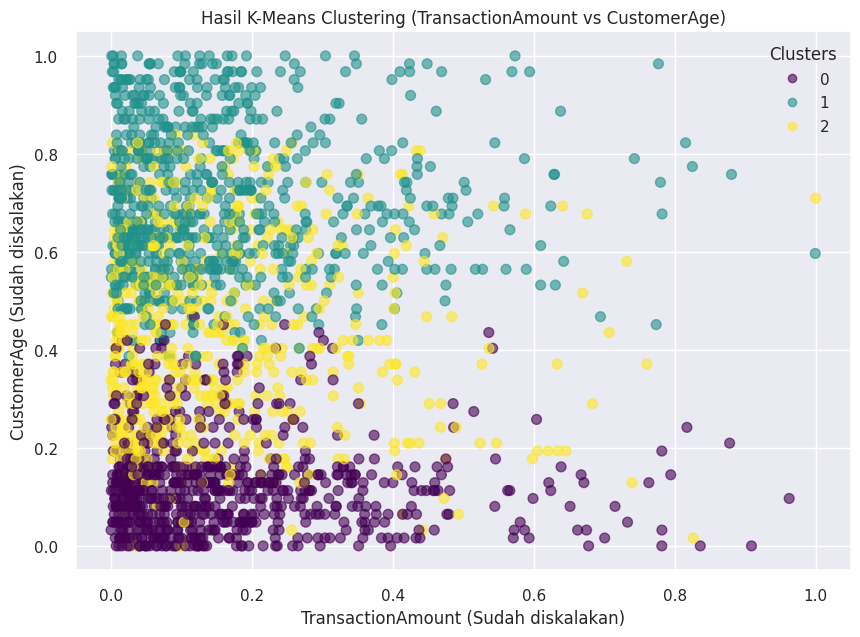

In [26]:
# Membuat visualisasi hasil clustering
# Membuat fungsi agregasi untuk menghilangkan kolom selain fitur numerik
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
all_cols = df_scaled.columns.tolist()
categorical_cols = [col for col in all_cols if col not in numerical_cols]
kmeans.fit(df_scaled.drop(columns=categorical_cols))

# Menambahkan kolom 'Cluster' pada label cluster
df_scaled['Cluster'] = kmeans.labels_

# Membuat visualisasi hasil agregasi
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_scaled['TransactionAmount'], df_scaled['CustomerAge'], c=df_scaled['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('Hasil K-Means Clustering (TransactionAmount vs CustomerAge)')
plt.xlabel('TransactionAmount (Sudah diskalakan)')
plt.ylabel('CustomerAge (Sudah diskalakan)')
legend = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [27]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

In [28]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [29]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Konversi semua nama kolom menjadi tipe string
df_scaled.columns = df_scaled.columns.astype(str)

# Temukan nama kolom yang tidak termasuk fitur numerik
all_cols = df_scaled.columns.tolist()
categorical_cols_after_processing = [col for col in all_cols if col not in numerical_cols]

# Menambahkan fungsi agregasi seperti kmeans
kmeans.fit(df_scaled.drop(columns=categorical_cols_after_processing))

# Menambahkan kolom 'Cluster' pada label cluster
df_scaled['Cluster'] = kmeans.labels_

# Menerapkan dan menampilkan hasil agregasi untuk fitur numerik
agg_result = df_scaled.groupby('Cluster')[numerical_cols].agg(["mean", "min", "max", "median", "std"])
pd.set_option('display.max_columns', None)
display(agg_result.head())

TransactionAmount                                         CustomerAge  \
                     mean       min       max    median       std        mean   
Cluster                                                                         
0                0.169103  0.000000  0.962453  0.121313  0.164975    0.128241   
1                0.161146  0.000317  0.999443  0.115258  0.158072    0.707759   
2                0.157017  0.000033  1.000000  0.109922  0.152571    0.434859   

                                                TransactionDuration       \
              min       max    median       std                mean  min   
Cluster                                                                    
0        0.000000  0.467742  0.112903  0.100308            0.383506  0.0   
1        0.387097  1.000000  0.693548  0.152379            0.361231  0.0   
2        0.000000  0.838710  0.419355  0.196650            0.398992  0.0   

                                      LoginAttempts                   \
              max    median       std          mean  min  max median   
Cluster                                                                
0        1.000000  0.355172  0.254259      0.027929  0.0  1.0    0.0   
1        0.986207  0.337931  0.228139      0.027174  0.0  1.0    0.0   
2        1.000000  0.386207  0.250813      0.033926  0.0  1.0    0.0   

                  AccountBalance                                          
              std           mean       min       max    median       std  
Cluster                                                                   
0        0.141506       0.110971  0.000000  0.475436  0.073677  0.112009  
1        0.144733       0.288099  0.001256  0.606721  0.287701  0.147817  
2        0.148005       0.661755  0.349336  1.000000  0.635342  0.167084

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0**:
#### **Rata-rata (mean) :**

- Transaction Amount: ~0.169
- Customer Age: ~0.128
- Transaction Duration: ~0.384s
- Login Attempts: ~0.028
- Account Balance: ~0.111

#### **Analisis:**

Cluster ini mencakup rata-rata (mean) nilai transaksi (Transaction Amount), usia pelanggan (Customer Age), durasi transaksi (Transaction Duration), upaya login (Login Attempts), dan saldo akun (Account Balance) yang relatif rendah dibandingkan cluster lainnya. Ini mewakili kelompok pelanggan dengan aktivitas transaksi yang lebih kecil atau akun baru. Sehingga rekomendasi yang dapat diberikan adalah dengan menaikkan suku bunga pada setiap transaksi.

2. **Cluster 1**:

#### **Rata-rata (mean) :**

- Transaction Amount: ~0.161
- Customer Age: ~0.708
- Transaction Duration: ~0.361s
- Login Attempts: ~0.027
- Account Balance: ~0.288

#### **Analisis:**

Cluster tersebut memiliki rata-rata (mean) usia pelanggan(Customer Age) relaltif tinggi. Sedangkan, nilai transaksi (Transaction Amount), durasi transaksi (Transaction Duration), upaya login (Login Attempts), dan saldo akun (Account Balance) memiliki rata-rata (mean) yang rendah. Hal ini memungkinkan adanya pola transaksi yang stabil atau mewakili pelanggan yang lebih senior. Rekomendasi yang dapat diberikan berupa menaikkan suku bunga atau menawarkan produk investasi jangka panjang seperti emas atau reksadana.

3. **Cluster 2**:

#### **Rata-rata (mean) :**
- Transaction Amount: ~0.157
- Customer Age: ~0.435
- Transaction Duration: ~0.399s
- Login Attempts: ~0.034
- Account Balance: ~0.662

#### **Analisis:**

Cluster ini mendapati rata-rata (mean) tertinggi pada saldo akun (Account Balance).Sedangkan, rata-rata (mean) terendah terdapat pada nilai transaksi (Transaction Amount), usia pelanggan (Customer Age), durasi transaksi (Transaction Duration), dan upaya login (Login Attempts). Hal ini mewakili pelanggan yang memiliki saldo besar dan melakukan transaksi secara moderat. Sehingga rekomendasi yang dapat diberikan berupa tawaran investasi jangka panjang seperti emas atau reksadana.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [30]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_scaled.rename(columns={'Cluster': 'Target'}, inplace=True)

In [31]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_scaled.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [32]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.
df_inverse = df_scaled.copy()
df_inverse[numerical_cols] = scalar.inverse_transform(df_scaled[numerical_cols])
df_inverse.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate,TransactionDate,Target
0,14.09,70.0,81.0,1.0,5112.21,1,36,0,0,2024-11-04 08:08:08,2023-04-11 16:29:14,1
1,376.24,68.0,141.0,1.0,13758.91,1,15,0,0,2024-11-04 08:09:35,2023-06-27 16:44:19,2
2,126.29,19.0,56.0,1.0,1122.35,1,23,2,3,2024-11-04 08:07:04,2023-07-10 18:16:08,0
3,184.50,26.0,25.0,1.0,8569.06,1,33,2,3,2024-11-04 08:09:06,2023-05-05 16:32:11,2
4,92.15,18.0,172.0,1.0,781.68,1,28,0,3,2024-11-04 08:06:36,2023-04-03 17:15:01,0


In [33]:
# inverse dataset that has been encoded back to its original category.
# Complete the following code if you want to apply this criterion (please remove the hash symbol from the code that will be used.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# display the dataset that has been inverse
# ___.head()
df_inverse = df_scaled.copy()

# Inverse transform numerical columns Lakukan inverse transform pada numerical columns
df_inverse[numerical_cols] = scalar.inverse_transform(df_scaled[numerical_cols])

# Inverse transform categorical columns dengan encoder asli
for col in categorical_cols_to_encode:
    df_inverse[col] = encoders[col].inverse_transform(df_inverse[col].astype(int))

df_inverse.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate,TransactionDate,Target
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,2024-11-04 08:08:08,2023-04-11 16:29:14,1
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,2024-11-04 08:09:35,2023-06-27 16:44:19,2
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,2024-11-04 08:07:04,2023-07-10 18:16:08,0
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,2024-11-04 08:09:06,2023-05-05 16:32:11,2
4,92.15,18.0,172.0,1.0,781.68,Debit,Oklahoma City,ATM,Student,2024-11-04 08:06:36,2023-04-03 17:15:01,0


In [34]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# Menambahkan labe cluster labels ke df_inverse
df_inverse['Cluster'] = df_scaled['Target']

agg_result_inverse_numerical = df_inverse.groupby('Cluster')[numerical_cols].agg(["mean", "min", "max", "median", "std"])

# Menambahkan label cluster menjadi bentuk asli df_processed sebelum dropping columns
agg_result_inverse_categorical = df_inverse.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A')

# Menampilkan Hasil Statistik Deskriptif Agregasi Numerikal
print("Hasil Agregasi Numerikal (Ditransformasikan dalam Inverse):")
display(agg_result_inverse_numerical)

# Menampilkan Hasil Statistik Deskriptik Agregasi Kategorikal
print("\nHasil Agregasi Kategorikal (Mode):")
display(agg_result_inverse_categorical)

Hasil Agregasi Numerikal (Ditransformasikan dalam Inverse):


TransactionAmount                                     CustomerAge  \
                     mean   min      max   median         std        mean   
Cluster                                                                     
0              309.846866  0.26  1762.28  222.355  302.029166   25.950954   
1              295.279847  0.84  1830.00  211.270  289.390990   61.881074   
2              287.720355  0.32  1831.02  201.500  279.321230   44.961228   

                                      TransactionDuration                      \
          min   max median        std                mean   min    max median   
Cluster                                                                         
0        18.0  47.0   25.0   6.219083          121.216621  10.0  300.0  113.0   
1        42.0  80.0   61.0   9.447472          114.757033  10.0  296.0  108.0   
2        18.0  70.0   44.0  12.192302          125.707593  10.0  300.0  122.0   

                   LoginAttempts                            AccountBalance  \
               std          mean  min  max median       std           mean   
Cluster                                                                      
0        73.735012      1.111717  1.0  5.0    1.0  0.566022    1752.985450   
1        66.160204      1.108696  1.0  5.0    1.0  0.578931    4387.896317   
2        72.735791      1.135703  1.0  5.0    1.0  0.592019    9946.324960   

                                                   
             min       max    median          std  
Cluster                                            
0         102.20   7174.69  1198.210  1666.223819  
1         120.89   9127.65  4381.985  2198.891152  
2        5298.85  14977.99  9553.420  2485.504794


Hasil Agregasi Kategorikal (Mode):


,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate,TransactionDate,Cluster
Cluster,,,,,,,
0,Debit,Seattle,Branch,Student,2024-11-04 08:07:18,2023-01-02 16:00:06,0
1,Debit,Charlotte,ATM,Retired,2024-11-04 08:07:01,2023-01-02 16:06:29,1
2,Debit,San Jose,Branch,Doctor,2024-11-04 08:10:23,2023-01-02 16:27:18,2


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [35]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [36]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.